In [ ]:
# https://repo.anaconda.com/archive/Anaconda3-2020.02-Windows-x86_64.exe
# https://repo.anaconda.com/archive/Anaconda3-2020.02-MacOSX-x86_64.sh
# conda install -c conda-forge keras

In [1]:
#Importing important packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn.linear_regression, logisticregressor, svm - sklearn(scikit-learn)
#sklearn doesn't offer modern neural networks, so we have to use a python package called keras

import keras # Neural Networks
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Z-scaling -- (column - columnmean)/standard deviation
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

import os # os - operating system (Windows, Mac, Linux) os.mkdir('abc') --> will create a folder for me with the name 'abc'

In [2]:
data = pd.read_csv("/content/default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape

(30000, 25)

In [4]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#dependant variable is extracted from breast cancer data
target=data['default payment next month']
#dropping ID as this is index only and "default payment next month" is dependant variable
data=data.drop(['ID','default payment next month'],axis=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
target

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       1
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       1
47       1
48       0
49       0
50       1
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       1
61       0
62       1
63       1
64       0
65       1
66       1
67       0
68       0
69       0
70       0
71       1
72       0
73       0
74       0
75       0
76       0
77       0
78       1
79       1
80       0
81       0
82       1
83       0
84       0
85       0
86       1
87       0
88       0
89       0
90       1

In [7]:
#If any independant variable has missing value
pd.isnull(data).sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [8]:
#If dependant variable has missing value
pd.isnull(target).sum()

0

In [10]:
#To understand data type of different input variables. If it is categorical, we have to convert it back to continuous
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [9]:
data.shape

(30000, 23)

Since we have 30k rows of data, we have the luxury/flexibility to create 3 splits of the data, train, validation, test
We will train the model on train data, using the validation data we will select the best hyper-parameters, once the best model on validation split is obtained, we do it's .predict on test split.

When the data was small, we cannot make 3 splits (since each split would have been very very small with not enough datapoints for the model to understand the pattern of the data to make reliable predictions), So we create only 2 splits train & test, and we use k-fold cross-validation on the train split to find the best hyperparameters for the model. Then we use that model on test, .predict to find its final classification performance.

In [11]:
#divide dataset into training set and test set, splitting training set further to create cross-validation set
# and standardising dataset
# 70% train, 15% Validation, 15% Test
trainX, testX, trainY, testY = train_test_split(data, target, train_size=0.7, stratify=target, random_state=2)
testX, valX, testY, valY = train_test_split(testX, testY, test_size=0.5, stratify=testY, random_state=2)
print(trainY.shape)
print(np.sum(trainY))
print(valY.shape)
print(np.sum(valY))
print(testY.shape)
print(np.sum(testY))

(21000,)
4645
(4500,)
995
(4500,)
996


In [12]:
scaler=StandardScaler().fit(trainX) # computes mean and stddev of each column of the train split
trainX_scaled=scaler.transform(trainX) # operation - (column - its mean)/its stddev
valX_scaled=scaler.transform(valX)
testX_scaled=scaler.transform(testX)

In [13]:
model=Sequential() # Name suggests that the layers of the Neural Network will be in sequence
# Dense is just a name for a simple neural network layer

#1st hidden layer
model.add(Dense(32, input_dim=23, kernel_initializer='normal', activation='relu'))
              # 32 neurons, the first layer of a neural network must contain the input_dim which is the number of input data-columns
              # Initially weights of the neural network are random values drawn from a standard gaussian/normal distribution between -1 to 1

#2nd Hidden Layer
model.add(Dense(32, activation='relu'))

#3rd hidden layer
model.add(Dense(32, activation='relu'))

#Ouput layer(only 1 neuron because it is a binary classification problem, so we require only 1 output)
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Regression case model.add(Dense(1, kernel_initializer='normal')) Automatically use linear activation

In [14]:
model.summary()

# None will mean the batch size depending on the gradient descent method we use, Batch GD - None = Total rows, 
# Stochastic GD - None = 1
# Mini Batch GD - None = Batch Size

# Prama == Parameters (total number of weights and biases/intercepts for that layer)

# 1st Hidden Layer . number of i/p = 23 (23 weights+1bias/intercept = 24 parameters) for every hidden neuron,
# 32 hidden neurons in the 1st hidden layer == total parameters 24*32 = 768

#2nd hidden layer - (32 + 1)* 32 = 33*32 = 1056

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,913
Trainable params: 2,913
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Name of logistic loss in keras is binary_crossentropy
# adam - adaptive learning rate, thatswhy no need to provide learning rate

model.fit(x=trainX, y=trainY, batch_size=500, epochs=50, verbose=1,
                    validation_data=(valX, valY))
# 500 rows in each batch, 21000 rows ==> total 42 batches of data == 1 epoch

Epoch 1/50
42/42 [==============================] - 2s 25ms/step - loss: 148.8998 - accuracy: 0.5914 - val_loss: 12.0988 - val_accuracy: 0.7404
Epoch 2/50
42/42 [==============================] - 0s 2ms/step - loss: 8.3128 - accuracy: 0.7003 - val_loss: 4.6812 - val_accuracy: 0.6920
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 3.8762 - accuracy: 0.7008 - val_loss: 3.4435 - val_accuracy: 0.6082
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 2.9172 - accuracy: 0.6935 - val_loss: 2.6737 - val_accuracy: 0.6629
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 2.3095 - accuracy: 0.7081 - val_loss: 2.4219 - val_accuracy: 0.6751
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 2.3574 - accuracy: 0.6893 - val_loss: 3.7523 - val_accuracy: 0.7727
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 2.4751 - accuracy: 0.7083 - val_loss: 4.2958 - val_accuracy: 0.7771
Epoch 8/50
42/42

In [16]:
model2=Sequential()
model2.add(Dense(32, input_dim=23, kernel_initializer='normal', activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
if not os.path.exists('/content/saved_models'):
    os.mkdir('/content/saved_models')

filepath = '/content/saved_models/model-{epoch:05d}.h5'
num_epochs = 101
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history = model2.fit(x=trainX_scaled, y=trainY, batch_size=500, epochs=num_epochs, verbose=1, callbacks=callbacks_list,
                    validation_data=(valX_scaled, valY))

Epoch 1/101
42/42 [==============================] - 1s 9ms/step - loss: 0.6595 - accuracy: 0.7661 - val_loss: 0.5314 - val_accuracy: 0.7789

Epoch 00001: saving model to /content/saved_models/model-00001.h5
Epoch 2/101
42/42 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7800 - val_loss: 0.4862 - val_accuracy: 0.7789

Epoch 00002: saving model to /content/saved_models/model-00002.h5
Epoch 3/101
42/42 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7741 - val_loss: 0.4659 - val_accuracy: 0.7882

Epoch 00003: saving model to /content/saved_models/model-00003.h5
Epoch 4/101
42/42 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8036 - val_loss: 0.4562 - val_accuracy: 0.8062

Epoch 00004: saving model to /content/saved_models/model-00004.h5
Epoch 5/101
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8157 - val_loss: 0.4522 - val_accuracy: 0.8080

Epoch 00005: saving model 

In [18]:
history.history # Python Dictionary with 4 keys accuracy, loss (training), val_loss, val_accuracy

{'accuracy': [0.7748571634292603,
  0.7788095474243164,
  0.7796666622161865,
  0.8086666464805603,
  0.8138095140457153,
  0.8159523606300354,
  0.8171904683113098,
  0.8186666369438171,
  0.8195714354515076,
  0.8201428651809692,
  0.8207142949104309,
  0.8205237984657288,
  0.8213809728622437,
  0.8212857246398926,
  0.8216190338134766,
  0.8212857246398926,
  0.821571409702301,
  0.8212857246398926,
  0.8209999799728394,
  0.8224285840988159,
  0.8220475912094116,
  0.8227618932723999,
  0.8216666579246521,
  0.8222380876541138,
  0.8226190209388733,
  0.8230476379394531,
  0.8219524025917053,
  0.8235238194465637,
  0.8221428394317627,
  0.8233809471130371,
  0.8234761953353882,
  0.8239047527313232,
  0.8239523768424988,
  0.8246190547943115,
  0.8224285840988159,
  0.8240476250648499,
  0.8248571157455444,
  0.8247143030166626,
  0.8244285583496094,
  0.8247143030166626,
  0.8253809809684753,
  0.8247619271278381,
  0.8243333101272583,
  0.8250952363014221,
  0.8247619271278381,

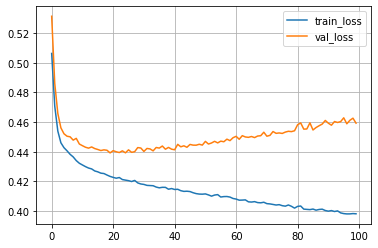

In [19]:
# Python Dictionary with 4 keys accuracy, loss (training), val_loss, val_accuracy
plt.plot(range(num_epochs-1), history.history['loss'][1:], label='train_loss')
plt.plot(range(num_epochs-1), history.history['val_loss'][:-1], label='val_loss')
plt.legend()
plt.grid()
plt.show()

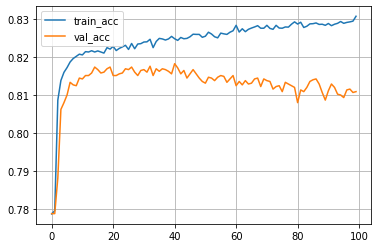

In [22]:
plt.plot(range(num_epochs-1), history.history['accuracy'][1:], label='train_acc')
plt.plot(range(num_epochs-1), history.history['val_accuracy'][:-1], label='val_acc')
plt.legend()
plt.grid()
plt.show()

In [23]:
print('Minimum Validation Loss:', np.min(history.history['val_loss']))
print('Best epoch corresponding to Minimum Validation Loss:', np.argmin(history.history['val_loss'])+1)

Minimum Validation Loss: 0.4392803907394409
Best epoch corresponding to Minimum Validation Loss: 20


In [24]:
model_best = load_model('/content/saved_models/model-00020.h5')

In [25]:
print('AUC on test =', roc_auc_score(y_true=testY, y_score=model_best.predict_proba(testX_scaled)))

AUC on test = 0.7790997036089564


In [26]:
print('AUC on train =', roc_auc_score(y_true=trainY, y_score=model_best.predict_proba(trainX_scaled)))

AUC on train = 0.7925555991771642
